In [2]:
import numpy as np
import os
from os import listdir
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [4]:
#Load the 2nd dataset
import pandas as pd

#The data set : https://www.kaggle.com/datasets/debanga/facial-expression-recognition-challenge?resource=download
#Rename the folder as faceEmotion_dataset_v2

# read the CSV file
df = pd.read_csv("faceEmotion_dataset_v2/icml_face_data.csv")

num_classes = 7

# print the first few rows of the DataFrame
print(df.head())

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
def remove_emotion(df, numberEmotion):
    '''Remove the "numberEmotion" from the dataset df'''
    maskEmotion = df["emotion"] != numberEmotion

    return df.loc[maskEmotion]

# If we want to remove an emotion from the data, we can use this code
# df = remove_emotion(df, 2)
# df = remove_emotion(df, 3)
# df = remove_emotion(df, 6)
df = df.reset_index()
df

,index,emotion,Usage,pixels
0,0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...,...
35882,35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [6]:
#Split between training and test
maskTraining = df[" Usage"] == "Training"
maskTest = [not elem for elem in maskTraining]

df_train = df.loc[maskTraining]
df_test = df.loc[maskTest]

In [7]:
def list_string_to_arrayImages(L, sizeX=48, sizeY=48):

    Images_Dataset = []
    for k in range(L.index[0], L.index[-1] + 1):
        # split the string into a list of strings
        # lst = df[" pixels"][k].split()
        lst = L[k].split()

        # convert the strings to integers using map() and a lambda function
        lst = list(map(lambda x: int(x), lst))

        Images_Dataset.append(lst)
    Images_Dataset = np.array(Images_Dataset)
    Images_Dataset = Images_Dataset.reshape(Images_Dataset.shape[0], sizeX , sizeY)
    Images_Dataset = Images_Dataset.astype('float32')
    Images_Dataset /= 255
    return Images_Dataset

In [8]:
#Proprocess dataset and get X_train and X_test
X_train = list_string_to_arrayImages(df_train[" pixels"])
X_test = list_string_to_arrayImages(df_test[" pixels"])

print((X_train).shape)
print((X_test).shape)


(28709, 48, 48)
(7178, 48, 48)


In [9]:
#get y_train and y_test
Labels_train = list(df_train["emotion"])
Labels_test = list(df_test["emotion"])

In [10]:
#change the shape of the object labels
y_train = to_categorical(Labels_train, num_classes) 
y_test = to_categorical(Labels_test, num_classes) 

In [11]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()
    
    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Epoch 1/10
898/898 [==============================] - 24s 26ms/step - loss: 1.6065 - accuracy: 0.3763
Epoch 2/10
898/898 [==============================] - 23s 25ms/step - loss: 1.4487 - accuracy: 0.4545
Epoch 3/10
898/898 [==============================] - 23s 25ms/step - loss: 1.3693 - accuracy: 0.4894
Epoch 4/10
898/898 [==============================] - 22s 25ms/step - loss: 1.3128 - accuracy: 0.5092
Epoch 5/10
898/898 [==============================] - 22s 25ms/step - loss: 1.2596 - accuracy: 0.5332
Epoch 6/10
898/898 [==============================] - 22s 25ms/step - loss: 1.2129 - accuracy: 0.5516
Epoch 7/10
898/898 [==============================] - 22s 25ms/step - loss: 1.1676 - accuracy: 0.5685
Epoch 8/10
898/898 [==============================] - 22s 25ms/step - loss: 1.1292 - accuracy: 0.5868
Epoch 9/10
898/898 [==============================] - 23s 25ms/step - loss: 1.0883 - accuracy: 0.6022
Epoch 10/10
898/898 [==============================] - 22s 25ms/step - loss: 1.053

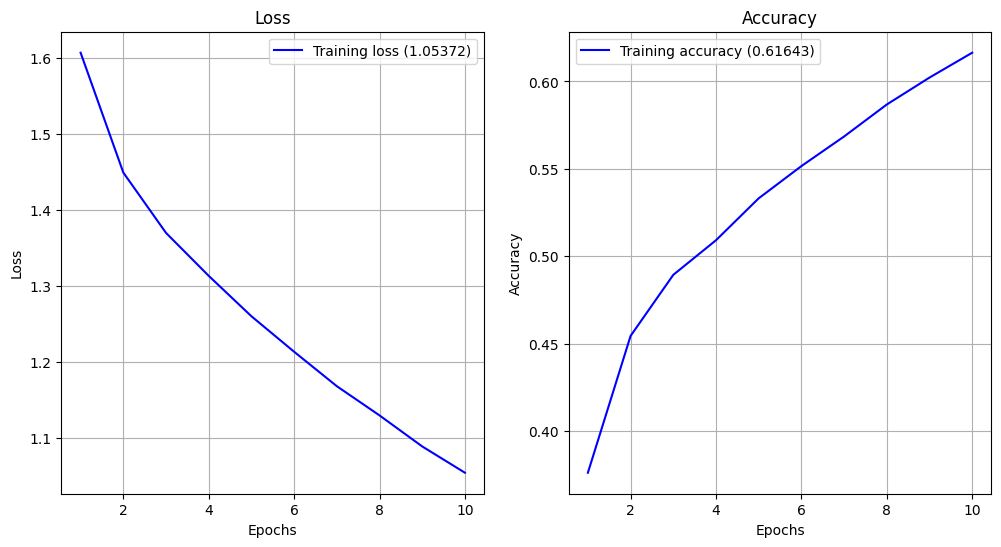

225/225 [==============================] - 2s 9ms/step
Accuracy: 0.48021733073279466
898/898 [==============================] - 8s 9ms/step


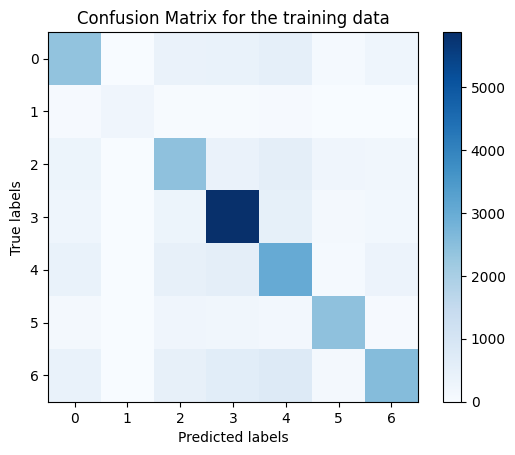

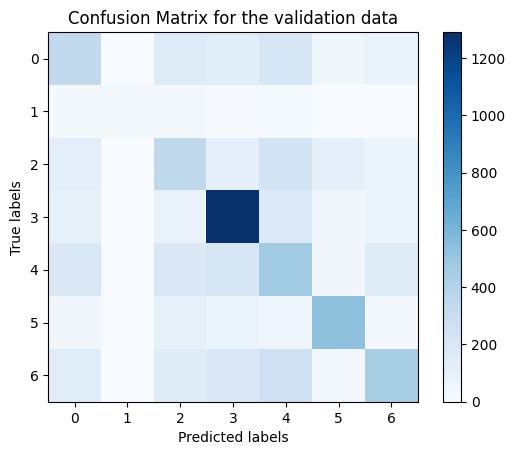

Accuracy by class: [0.35177453027139877, 0.26126126126126126, 0.33984375, 0.7271702367531003, 0.3777064955894146, 0.6401925391095066, 0.35685320356853206]
Precision: [0.34778122 0.85294118 0.32923368 0.63672261 0.33239238 0.64484848
 0.51764706]
Recall: [0.35177453 0.26126126 0.33984375 0.72717024 0.3777065  0.64019254
 0.3568532 ]
F1 score: [0.34976648 0.4        0.33445459 0.67894737 0.3536036  0.64251208
 0.42246759]


In [26]:
# define the model number 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32) # the epochs MUST be incremented, the results are way better

# check model results
plot_history(history)

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Accuracy:', accuracy)

predictions_class_train = np.argmax(model.predict(X_train), axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_train, axis=1), predictions_class_train)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the training data')
plt.show()

predictions_class = np.argmax(predictions, axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions_class)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the validation data')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
for i in range(num_classes):
    accuracy = cm[i, i] / cm[i].sum()
    accuracies.append(accuracy)
print("Accuracy by class:", accuracies)

# calculate the precision, recall, and F1 score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

In [12]:
# Good results, very similar to the previous model, but the accuracy increases slowlier than the previous one, and the result is finally slightly better. 
# It can be due to the Dropout layers, added to prevent overfitting. Nevertheless, in the model it has not been observed yet, so they may me unnecessary. 
# Also, the training time increases greatly, probably due to the increase of the layer number.
# define the model number 2
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# check model results
plot_history(history)

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Accuracy:', accuracy)

predictions_class_train = np.argmax(model.predict(X_train), axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_train, axis=1), predictions_class_train)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the training data')
plt.show()

predictions_class = np.argmax(predictions, axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions_class)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the validation data')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
for i in range(num_classes):
    accuracy = cm[i, i] / cm[i].sum()
    accuracies.append(accuracy)
print("Accuracy by class:", accuracies)

# calculate the precision, recall, and F1 score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Epoch 1/10
560/898 [=================>............] - ETA: 1:16 - loss: 1.6591 - accuracy: 0.3484

KeyboardInterrupt: 

Epoch 1/10
898/898 [==============================] - 82s 89ms/step - loss: 1.6948 - accuracy: 0.3237
Epoch 2/10
898/898 [==============================] - 79s 88ms/step - loss: 1.5853 - accuracy: 0.3819
Epoch 3/10
898/898 [==============================] - 78s 87ms/step - loss: 1.5183 - accuracy: 0.4056
Epoch 4/10
898/898 [==============================] - 65s 73ms/step - loss: 1.4631 - accuracy: 0.4317
Epoch 5/10
898/898 [==============================] - 41s 45ms/step - loss: 1.4053 - accuracy: 0.4578
Epoch 6/10
898/898 [==============================] - 43s 47ms/step - loss: 1.3443 - accuracy: 0.4825
Epoch 7/10
898/898 [==============================] - 42s 47ms/step - loss: 1.2716 - accuracy: 0.5143
Epoch 8/10
898/898 [==============================] - 41s 46ms/step - loss: 1.2044 - accuracy: 0.5405
Epoch 9/10
898/898 [==============================] - 41s 45ms/step - loss: 1.1246 - accuracy: 0.5746
Epoch 10/10
898/898 [==============================] - 41s 45ms/step - loss: 1.052

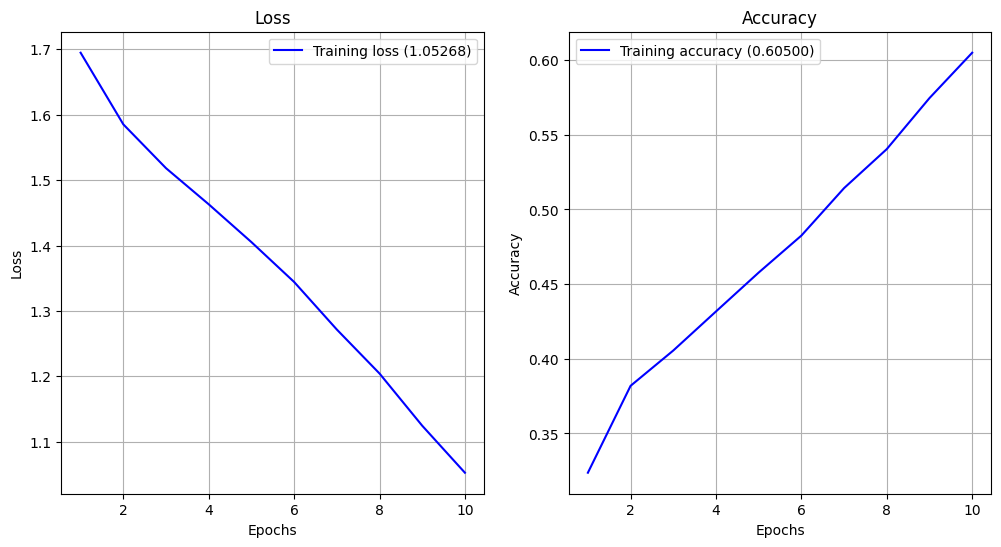

225/225 [==============================] - 4s 19ms/step
Accuracy: 0.41808303148509335
898/898 [==============================] - 14s 16ms/step


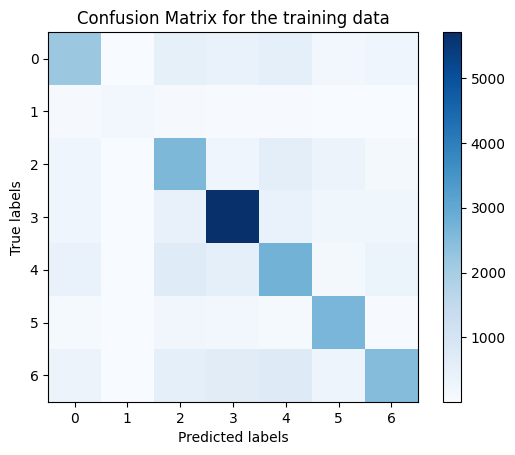

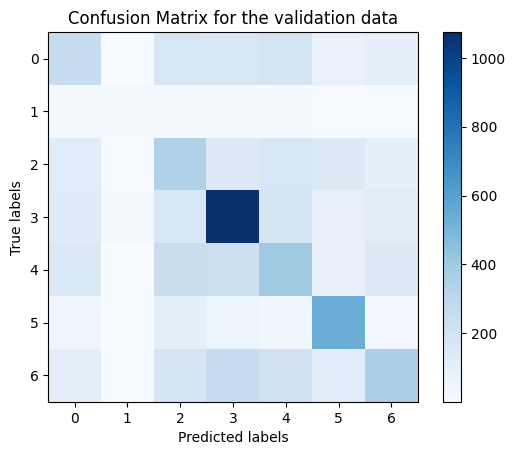

Accuracy by class: [0.27244258872651356, 0.21621621621621623, 0.3359375, 0.6059751972942503, 0.3199679230152366, 0.6474127557160048, 0.291970802919708]
Precision: [0.31108462 0.43636364 0.28336079 0.55184805 0.32571429 0.51434034
 0.42303173]
Recall: [0.27244259 0.21621622 0.3359375  0.6059752  0.31996792 0.64741276
 0.2919708 ]
F1 score: [0.29048414 0.28915663 0.30741734 0.57764643 0.32281553 0.57325519
 0.34548944]


In [13]:
# define the model number 3
# This model is the simplest in terms of conceptualization, as it is a basic neural network consisting solely of dense layers.
# Although it has a satisfactory training accuracy after 10 epochs, this model performs poorly in terms of generalization, as evidenced by its low validation accuracy of 0.41
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(48, 48, 1)))
model.add(Dense(20, activation='relu', input_shape=(48, 48, 1)))
model.add(Dense(20, activation='relu', input_shape=(48, 48, 1)))
model.add(Flatten())
model.add(Dense(100, activation='relu', input_shape=(48, 48, 1)))
model.add(Dense(100, activation='relu', input_shape=(48, 48, 1)))
model.add(Dense(num_classes, activation='sigmoid', ))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# check model results
plot_history(history)

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Accuracy:', accuracy)

predictions_class_train = np.argmax(model.predict(X_train), axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_train, axis=1), predictions_class_train)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the training data')
plt.show()

predictions_class = np.argmax(predictions, axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions_class)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the validation data')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
for i in range(num_classes):
    accuracy = cm[i, i] / cm[i].sum()
    accuracies.append(accuracy)
print("Accuracy by class:", accuracies)

# calculate the precision, recall, and F1 score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Epoch 1/10
898/898 [==============================] - 106s 117ms/step - loss: 1.7515 - accuracy: 0.2874
Epoch 2/10
898/898 [==============================] - 127s 141ms/step - loss: 1.4989 - accuracy: 0.4164
Epoch 3/10
898/898 [==============================] - 112s 125ms/step - loss: 1.3621 - accuracy: 0.4738
Epoch 4/10
898/898 [==============================] - 115s 128ms/step - loss: 1.2896 - accuracy: 0.5075
Epoch 5/10
898/898 [==============================] - 135s 150ms/step - loss: 1.2357 - accuracy: 0.5286
Epoch 6/10
898/898 [==============================] - 116s 129ms/step - loss: 1.1995 - accuracy: 0.5411
Epoch 7/10
898/898 [==============================] - 112s 125ms/step - loss: 1.1683 - accuracy: 0.5540
Epoch 8/10
898/898 [==============================] - 109s 121ms/step - loss: 1.1352 - accuracy: 0.5677
Epoch 9/10
898/898 [==============================] - 115s 128ms/step - loss: 1.1090 - accuracy: 0.5803
Epoch 10/10
898/898 [==============================] - 125s 140m

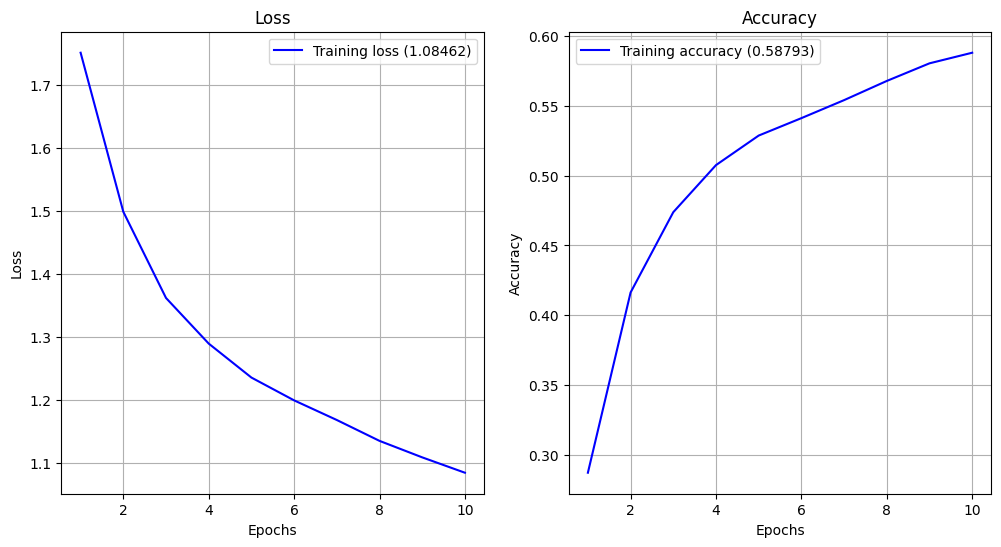

225/225 [==============================] - 7s 30ms/step
Accuracy: 0.5762050710504318
898/898 [==============================] - 27s 30ms/step


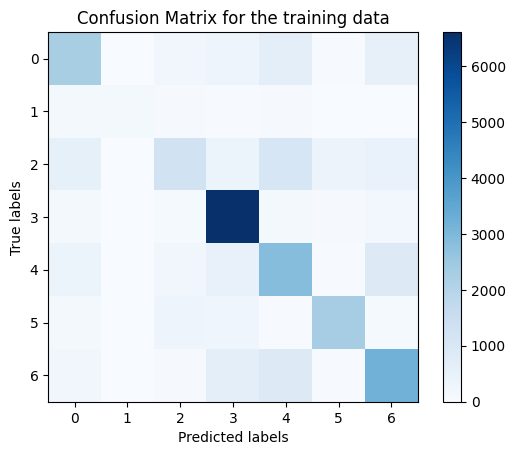

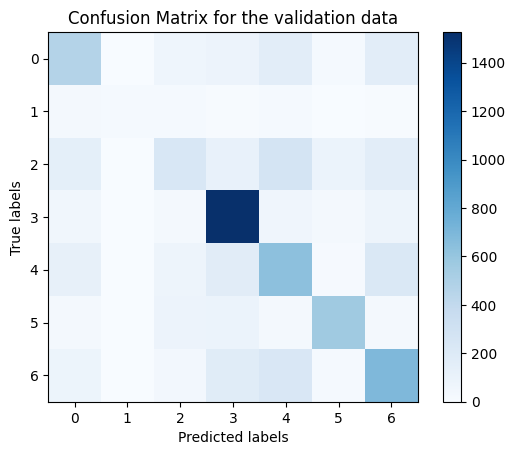

Accuracy by class: [0.48851774530271397, 0.17117117117117117, 0.232421875, 0.8602029312288614, 0.5108259823576584, 0.6762936221419976, 0.5563665855636658]
Precision: [0.50322581 0.63333333 0.42348754 0.70257827 0.45145287 0.75945946
 0.51462866]
Recall: [0.48851775 0.17117117 0.23242188 0.86020293 0.51082598 0.67629362
 0.55636659]
F1 score: [0.49576271 0.26950355 0.3001261  0.77344146 0.47930775 0.71546785
 0.53468433]


In [14]:
## define the model number 4
# This model is the most complicated, 4 Conv layers, 3 MaxPooling layers, 2 Dense layers. dropout layers are for reducing overfitting risk.
# This is the better result we have so far. Even if the accuracy during the training was lower than the one for model number3, the validation is way better. 
# This model is better for extracting informations and actually learning.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# check model results
plot_history(history)

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Accuracy:', accuracy)

predictions_class_train = np.argmax(model.predict(X_train), axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_train, axis=1), predictions_class_train)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the training data')
plt.show()

predictions_class = np.argmax(predictions, axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions_class)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the validation data')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
for i in range(num_classes):
    accuracy = cm[i, i] / cm[i].sum()
    accuracies.append(accuracy)
print("Accuracy by class:", accuracies)

# calculate the precision, recall, and F1 score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

In [26]:
## Model number 4, training with different epochs
# The training accuracy gets better when we increase the number of epoch, but the validation accuracy remains almost the same.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## epoch=13
# train the model, epoch = 13
history = model.fit(X_train, y_train, epochs=13, batch_size=32, verbose=0)

# Print the accuracy for the training with 
acc = history.history['accuracy']
print("Training accuracy for epoch = 13:", acc[-1])

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Validation accuracy for epoch = 13:', accuracy)
#___

## epoch = 15
# train the model, epoch = 15
history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=0)

# Print the accuracy for the training with 
acc = history.history['accuracy']
print("Training accuracy for epoch = 15:", acc[-1])

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Validation accuracy for epoch = 15:', accuracy)
#___

## epoch = 17
# train the model, epoch = 17
history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=0)

# Print the accuracy for the training with 
acc = history.history['accuracy']
print("Training accuracy for epoch = 17:", acc[-1])

# predictions  with the test data
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print('Validation accuracy for epoch = 17:', accuracy)
#___

Training accuracy for epoch = 13: 0.6061862111091614
225/225 [==============================] - 6s 28ms/step
Validation accuracy for epoch = 13: 0.5802451936472555
Training accuracy for epoch = 15: 0.6236023306846619
225/225 [==============================] - 6s 27ms/step
Validation accuracy for epoch = 15: 0.5766230147673447
Training accuracy for epoch = 17: 0.6365251541137695
225/225 [==============================] - 6s 28ms/step
Validation accuracy for epoch = 17: 0.5830314850933408


In [10]:
predictions = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))


print('Accuracy:', accuracy)

225/225 [==============================] - 3s 13ms/step
Accuracy: 0.47826692672053495


898/898 [==============================] - 12s 13ms/step


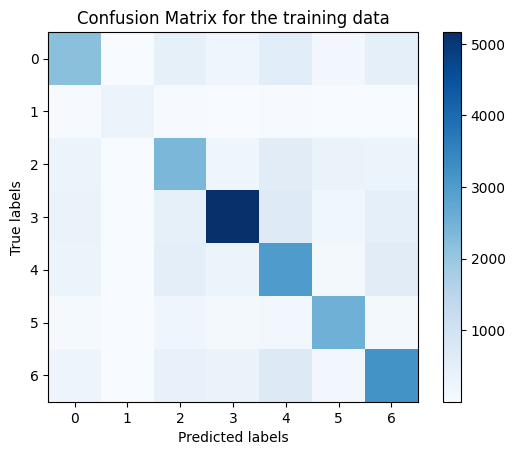

In [11]:
predictions_class_train = np.argmax(model.predict(X_train), axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_train, axis=1), predictions_class_train)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the training data')
plt.show()

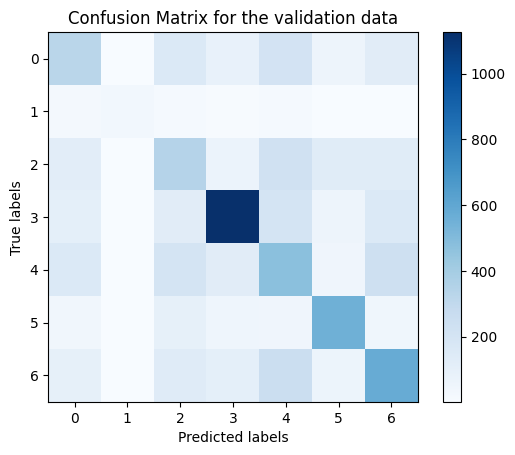

In [12]:
predictions_class = np.argmax(predictions, axis=1)
# y_test and predictions_class are the true labels and predicted labels, respectively
cm = confusion_matrix(np.argmax(y_test, axis=1), predictions_class)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the validation data')
plt.show()

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracies = []
for i in range(num_classes):
    accuracy = cm[i, i] / cm[i].sum()
    accuracies.append(accuracy)
print("Accuracy by class:", accuracies)

# calculate the precision, recall, and F1 score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy by class: [0.33820459290187893, 0.32432432432432434, 0.3349609375, 0.6347237880496054, 0.38011226944667204, 0.6666666666666666, 0.46715328467153283]
Precision: [0.37543453 0.62068966 0.31788693 0.71492063 0.33450953 0.60612691
 0.45283019]
Recall: [0.33820459 0.32432432 0.33496094 0.63472379 0.38011227 0.66666667
 0.46715328]
F1 score: [0.35584843 0.4260355  0.32620067 0.67243953 0.35585586 0.63495702
 0.45988024]
